In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()


## Numerical example

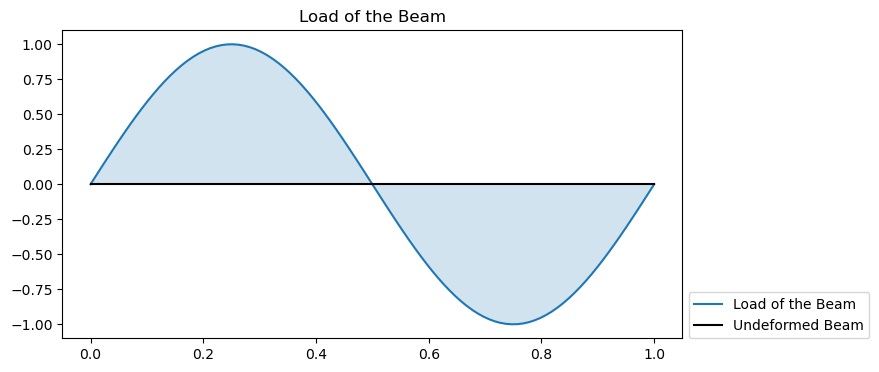

In [11]:
X = np.linspace(0, 1, 100)
F = np.sin(2*np.pi*X) #sym.lambdify(x, f, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Load of the Beam')
ax.plot(X, F, 'C0', label='Load of the Beam');
ax.plot(np.linspace(0, 1, 100), np.zeros(100), 'k-', label='Undeformed Beam');
ax.fill_between(X, F, alpha=0.2);
ax.legend(loc=(1.01, 0));

$$\frac{d^4 u }{d x^4} = f(x)$$
For 4th derivative we need 4 neighbouring points to get the 2nd order approximation. Taylor series with the 5th derivative as well.

$$u_{j+2} = u_j + 2h \cdot u_j' + \frac{1}{2} \cdot 4h^2 u_j'' + \frac{1}{6} \cdot 8h^3 u_j''' + \frac{1}{24} \cdot 16h^4 u_j'''' + \frac{1}{120} \cdot 32h^5 u_j''''' +  O(h^6)$$

$$u_{j+1} = u_j + h \cdot u_j' + \frac{1}{2} \cdot h^2 u_j'' + \frac{1}{6} \cdot h^3 u_j''' + \frac{1}{24} \cdot h^4 u_j'''' + \frac{1}{120} \cdot h^5 u_j''''' +  O(h^6)$$

$$u_{j-1} = u_j - h \cdot u_j' + \frac{1}{2} \cdot h^2 u_j'' - \frac{1}{6} \cdot h^3 u_j''' + \frac{1}{24} \cdot h^4 u_j'''' - \frac{1}{120} \cdot 32h^5 u_j''''' +  O(h^6)$$

$$u_{j-2} = u_j - 2h \cdot u_j' + \frac{1}{2} \cdot 4h^2 u_j'' - \frac{1}{6} \cdot 8h^3 u_j''' + \frac{1}{24} \cdot 16h^4 u_j'''' - \frac{1}{120} \cdot 32h^5 u_j''''' +  O(h^6)$$

Multiply each equation with $\alpha$, $\beta$, $\gamma$, $\delta$:

$$\alpha \cdot u_{j+2}$$
$$\beta \cdot u_{j+1}$$
$$\gamma \cdot u_{j-1}$$
$$\delta \cdot u_{j-2}$$

Sum the result:

$$\alpha \cdot u_{j+2} + \beta \cdot u_{j+1} + \gamma \cdot u_{j-1} + \delta \cdot u_{j-2} = $$
$$(\alpha + \beta + \gamma + \delta) \cdot u_j + $$
$$ h \cdot (2\alpha + \beta - \gamma - 2 \delta) \cdot u_j' + $$
$$ \frac{h^2}{2} \cdot (4\alpha + \beta + \gamma + 4 \delta) \cdot u_j'' + $$
$$ \frac{h^3}{6} \cdot (8\alpha + \beta - \gamma - 8 \delta) \cdot u_j''' + $$
$$ \frac{h^4}{24} \cdot (16\alpha + \beta + \gamma + 16 \delta) \cdot u_j'''' + $$
$$ \frac{h^5}{120} \cdot (32\alpha + \beta - \gamma - 32 \delta) \cdot u_j'''' + $$
$$\mathcal{O}\left(h^{6}\right)$$

We dont worry about this one:
$$(\alpha + \beta + \gamma + \delta) \cdot u_j \rightarrow (\alpha + \beta + \gamma + \delta)$$
These must be 0:
$$ h \cdot (2\alpha + \beta - \gamma - 2 \delta) \cdot u_j' = 0 $$
$$ \frac{h^2}{2} \cdot (4\alpha + \beta + \gamma + 4 \delta) \cdot u_j'' = 0 $$
$$ \frac{h^3}{6} \cdot (8\alpha + \beta - \gamma - 8 \delta) \cdot u_j''' = 0 $$
We are looking for thisone therefore it musst be = 1:
$$ \frac{h^4}{24} \cdot (16\alpha + \beta + \gamma + 16 \delta) \cdot u_j'''' = 1$$
This one we don't worry about:
$$ \frac{h^5}{120} \cdot (32\alpha + \beta - \gamma - 32 \delta) \cdot u_j'''''$$

Boundary conditions:
$$u(x=0)=0$$
$$u(x=1)=0$$
$$\frac{du}{dx} (x=0)=0$$
$$\frac{du}{dx} (x=1)=0$$

We calculate:
$$\alpha = \delta = \frac{1}{h^4}$$
$$\beta = \gamma = -\frac{1}{h^4}$$
And we get the final result:
$$u_j'''' = \frac{1}{h^4} (u_{j+2} - 4u_{j+1} + 6u_{j} -4u_{j-1} + u_{j-2}) + \mathcal{O}\left(h^{2}\right)$$

In the first and last point the solution is known from boundary condition. The second point from each end follows the approximation with the help of the second boundary condition:
On the left (in point $u_2$) from the boundary condition we get $u_0 = u_2$
On the right (in point $u_{N-1}$) we get 

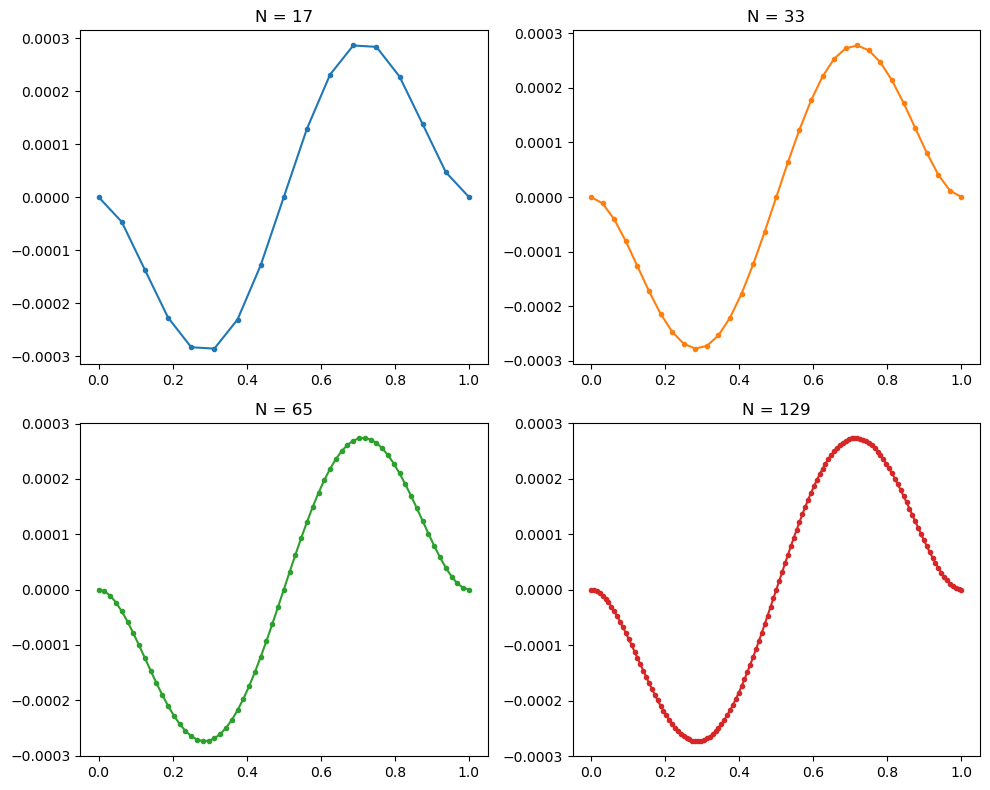

In [20]:
options = [17, 33, 65, 129]


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# For P
# P1 = np.zeros_like(options[0])
# P2 = np.zeros_like(options[1])

R1 = options[1] / options[0]
R2 = options[2] / options[1]

# create an array 3x17 named u_p1
u_p1 = np.zeros((3, options[0]))
u_p2 = np.zeros((3, options[1]))
#calculation
for idx, N in enumerate(options):
    j = np.linspace(0, 1, N)
    load = np.sin(2 * np.pi * j)

    u = np.zeros_like(j)
    h = 1 / (N - 1)
    A = np.zeros((N, N))

    A[0, 0] = 1             # Boundary condition 1
    A[-1, -1] = 1           # Boundary condition 2
    for i in range(2, N - 2):
        A[i, i-2:i+3] = [1, -4, 6, -4, 1]

    for i in [2]:
        A[1, i - 2:i + 3] = [-4, 7, -4, 1, 0]   # second point from the left
        A[-2, -5:] = [0, 1, -4, 7, -4]          # second point from the right

    f = np.zeros_like(j)
    for i in range(len(f)):
        f[i] = load[i] * h ** 4

    u = np.linalg.solve(A, -f)

    # Plot on the respective subplot
    row = idx // 2
    col = idx % 2
    axs[row, col].plot(j, u, 'o-', color=f'C{idx}', ms=3)
    axs[row, col].set_title(f'N = {N}') 
    
    if idx ==0:                 # Store the solution for N = 17
        u_p1[0, :] = u
    elif idx ==1:               # Store the solution for N = 33
        u_p1[1, :] = u[::2]
        u_p2[0, :] = u
    elif idx ==2:               # Store the solution for N = 65
        u_p1[2, :] = u[::4]
        u_p2[1, :] = u[::2]
    elif idx ==3:               # Store the solution for N = 129
        u_p2[2, :] = u[::4] 
# Adjust layout and show the plots
fig.tight_layout()
plt.show()


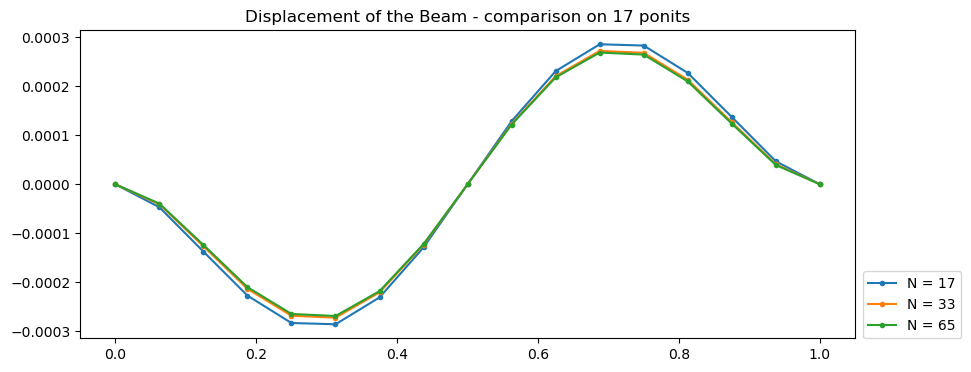

In [23]:
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(3):
    ax.plot(np.linspace(0, 1, options[0]), u_p1[i, :], 'o-', ms=3, label=f'N = {options[i]}')
ax.title.set_text('Displacement of the Beam - comparison on 17 ponits')
ax.legend(loc=(1.01, 0));

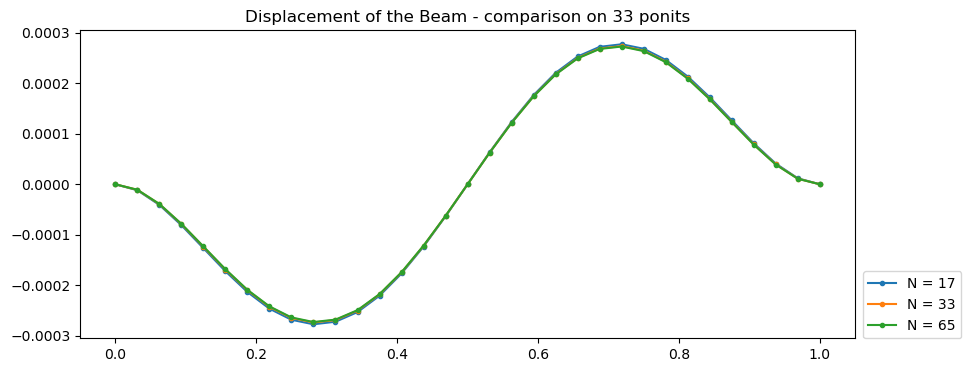

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(3):
    ax.plot(np.linspace(0, 1, options[1]), u_p2[i, :], 'o-', ms=3, label=f'N = {options[i]}')
ax.title.set_text('Displacement of the Beam - comparison on 33 ponits')
ax.legend(loc=(1.01, 0));

In [28]:
for i in np.arange(len(P1)):
    if (u_p1[1, i] - u_p1[0, i]) != 0:
        P1 = np.log((u_p1[2, i] - u_p1[1, i]) / (u_p1[1, i] - u_p1[0, i])) / np.log(R1)
P2 = np.log((u_p2[2, i] - u_p2[1, i]) / (u_p2[1, i] - u_p2[0, i])) / np.log(R2)

C:\Users\marko\AppData\Local\Temp\ipykernel_14612\1070802896.py:1: RuntimeWarning: divide by zero encountered in divide
  P1 = np.log((u_p1[2, :] - u_p1[1, :]) / (u_p1[1, :] - u_p1[0, :])) / np.log(R1)
C:\Users\marko\AppData\Local\Temp\ipykernel_14612\1070802896.py:1: RuntimeWarning: invalid value encountered in log
  P1 = np.log((u_p1[2, :] - u_p1[1, :]) / (u_p1[1, :] - u_p1[0, :])) / np.log(R1)
C:\Users\marko\AppData\Local\Temp\ipykernel_14612\1070802896.py:2: RuntimeWarning: divide by zero encountered in log
  P2 = np.log((u_p2[2, :] - u_p2[1, :]) / (u_p2[1, :] - u_p2[0, :])) / np.log(R2)
C:\Users\marko\AppData\Local\Temp\ipykernel_14612\1070802896.py:2: RuntimeWarning: invalid value encountered in log
  P2 = np.log((u_p2[2, :] - u_p2[1, :]) / (u_p2[1, :] - u_p2[0, :])) / np.log(R2)


array([        nan, -2.1074206 , -2.10770906, -2.1079272 , -2.10808964,
       -2.1082068 , -2.10828587, -2.10833156,         nan, -2.10833156,
       -2.10828587, -2.1082068 , -2.10808964, -2.1079272 , -2.10770906,
       -2.1074206 , -4.18002848])

### details

h = 0.167
[[ 1.  0.  0.  0.  0.  0.  0.]
 [-4.  7. -4.  1.  0.  0.  0.]
 [ 1. -4.  6. -4.  1.  0.  0.]
 [ 0.  1. -4.  6. -4.  1.  0.]
 [ 0.  0.  1. -4.  6. -4.  1.]
 [ 0.  0.  0.  1. -4.  7. -4.]
 [ 0.  0.  0.  0.  0.  0.  1.]]


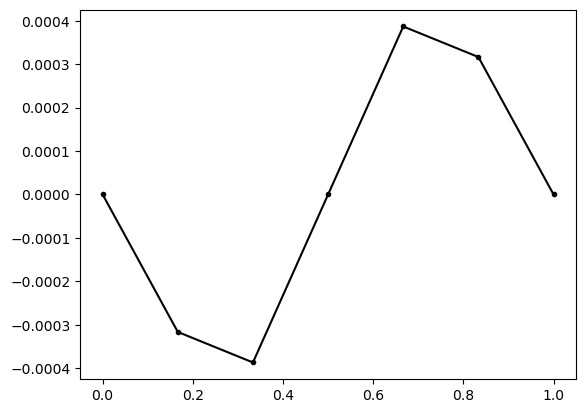

In [15]:
# N = 7
# j = np.linspace(0, 1, N)
# load = np.sin(2*np.pi*j)

# # Create an empty vector of deformation
# u17 = np.zeros_like(j)

# h17 = 1/(N-1)
# A = np.zeros((N, N))

# A[0, 0] = 1 ## Boundary condition
# A[-1, -1] = 1 ## Boundary condition
# for i in range(2, N-2):
#     A[i, i-2:i+3] = [1, -4, 6, -4, 1]


# for i in [2]:
#     A[i-1, i-2:i+3] = [-4, 7, -4, 1, 0]
#     A[-2, -5:] = [0, 1, -4, 7, -4]
# # print(A)

# f = np.zeros_like(j)
# for i in range(len(f)):
#         f[i] = load[i]*h17**4
    
# # Solve the equation
# u17 = np.linalg.solve(A, -f)

# plt.plot(j, u17, 'o-', color='k', ms=3);
# print(f'h = {h17:.3f}')
# print(A)

h = 0.031


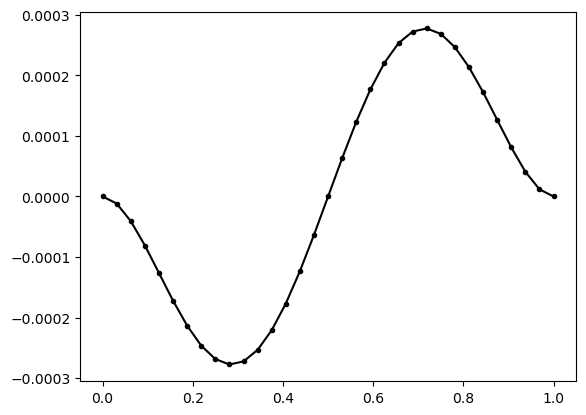

In [48]:
# N = 33
# j = np.linspace(0, 1, N)
# load = np.sin(2*np.pi*j)

# # Create an empty vector of deformation
# u33 = np.zeros_like(j)

# h33 = 1/(N-1)
# A = np.zeros((N, N))

# A[0, 0] = 1 ## Boundary condition
# A[-1, -1] = 1 ## Boundary condition
# for i in range(2, N-2):
#     A[i, i-2:i+3] = [1, -4, 6, -4, 1]


# for i in [2]:
#     A[i-1, i-2:i+3] = [-4, 7, -4, 1, 0]
#     A[-2, -5:] = [0, 1, -4, 7, -4]
# # print(A)

# f = np.zeros_like(j)
# for i in range(len(f)):
#         f[i] = load[i]*h33**4
    
# # Solve the equation
# u33 = np.linalg.solve(A, -f)

# plt.plot(j, u33, 'o-', color='k', ms=3);
# print(f'h = {h33:.3f}')

h = 0.016


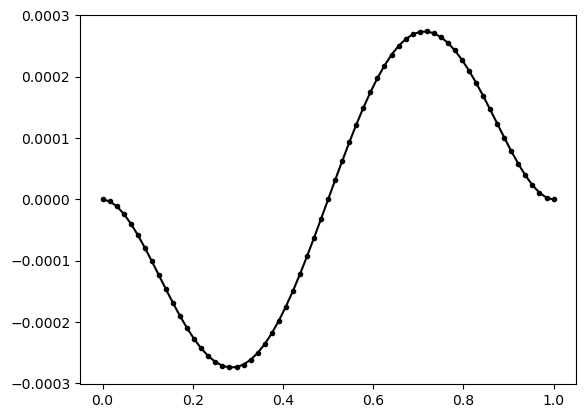

In [49]:
# N = 65
# j = np.linspace(0, 1, N)
# load = np.sin(2*np.pi*j)

# # Create an empty vector of deformation
# u65 = np.zeros_like(j)

# h65 = 1/(N-1)
# A = np.zeros((N, N))

# A[0, 0] = 1 ## Boundary condition
# A[-1, -1] = 1 ## Boundary condition
# for i in range(2, N-2):
#     A[i, i-2:i+3] = [1, -4, 6, -4, 1]


# for i in [2]:
#     A[i-1, i-2:i+3] = [-4, 7, -4, 1, 0]
#     A[-2, -5:] = [0, 1, -4, 7, -4]
# # print(A)

# f = np.zeros_like(j)
# for i in range(len(f)):
#         f[i] = load[i]*h65**4
    
# # Solve the equation
# u65 = np.linalg.solve(A, -f)

# plt.plot(j, u65, 'o-', color='k', ms=3);
# print(f'h = {h65:.3f}')

h = 0.008


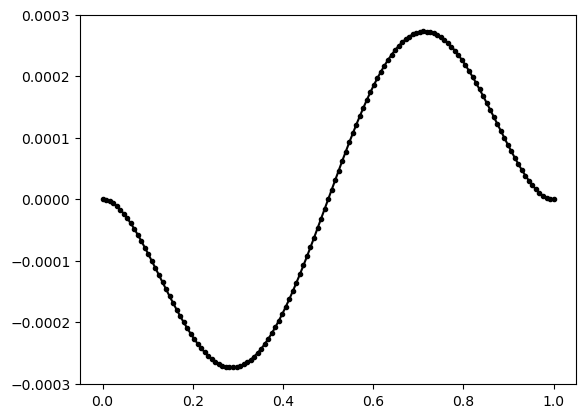

In [50]:
# N = 129
# j = np.linspace(0, 1, N)
# load = np.sin(2*np.pi*j)

# # Create an empty vector of deformation
# u129 = np.zeros_like(j)

# h129 = 1/(N-1)
# A = np.zeros((N, N))

# A[0, 0] = 1 ## Boundary condition
# A[-1, -1] = 1 ## Boundary condition
# for i in range(2, N-2):
#     A[i, i-2:i+3] = [1, -4, 6, -4, 1]


# for i in [2]:
#     A[i-1, i-2:i+3] = [-4, 7, -4, 1, 0]
#     A[-2, -5:] = [0, 1, -4, 7, -4]
# # print(A)

# f = np.zeros_like(j)
# for i in range(len(f)):
#         f[i] = load[i]*h129**4
    
# # Solve the equation
# u129 = np.linalg.solve(A, -f)

# plt.plot(j, u129, 'o-', color='k', ms=3);
# print(f'h = {h129:.3f}')

0.0625 0.03125 0.015625
h2/h3 = 2.000
h1/h2 = 2.000
17 33 65


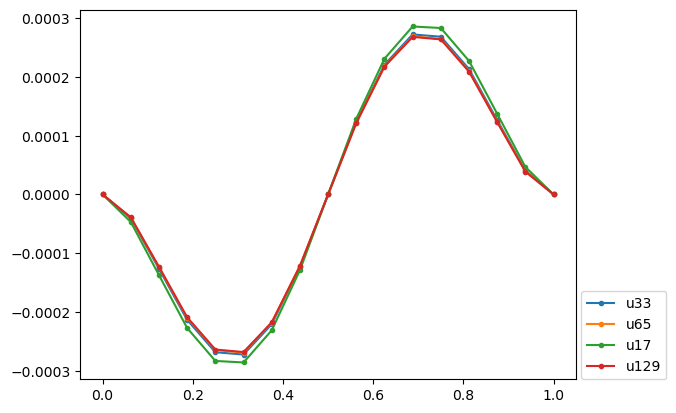

In [51]:
print(h17, h33, h65)
print(f'h2/h3 = {h33/h65:.3f}')
print(f'h1/h2 = {h17/h33:.3f}')

print(len(u17), len(u33), len(u65))
plt.plot(np.linspace(0, 1, 17), u33[::2], 'o-', ms=3, label='u33');
plt.plot(np.linspace(0, 1, 17), u65[::4], 'o-', ms=3, label='u65');
plt.plot(np.linspace(0, 1, 17), u17, 'o-', ms=3, label='u17');
plt.plot(np.linspace(0, 1, 17), u129[::8], 'o-', ms=3, label='u129');
plt.legend(loc=(1.01, 0));

$$P = \frac{\ln \frac{u_{h3} - u_{h2}}{u_{h2} - u_{h1}}}{\ln(r)}$$

In [52]:
np.arange(17)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

### P

$$P = \frac{\ln \frac{u_{h3} - u_{h2}}{u_{h2} - u_{h1}}}{\ln(r)}$$

In [53]:
P = np.zeros_like(17)
r = h17/h33
np.log((u65[::4] - u33[::2])/(u33[::2] - u17))/np.log(r)
P

C:\Users\marko\AppData\Local\Temp\ipykernel_5652\3651595701.py:3: RuntimeWarning: divide by zero encountered in divide
  np.log((u65[::4] - u33[::2])/(u33[::2] - u17))/np.log(r)
C:\Users\marko\AppData\Local\Temp\ipykernel_5652\3651595701.py:3: RuntimeWarning: invalid value encountered in log
  np.log((u65[::4] - u33[::2])/(u33[::2] - u17))/np.log(r)


array(0)

In [54]:
P = np.zeros_like(17)
r = h17/h33
for i in np.arange(17):
    P[i] = np.log((u65[::4][i] - u33[::2][i])/(u33[::2][i] - u17[i]))/np.log(r)
print(P)

C:\Users\marko\AppData\Local\Temp\ipykernel_5652\3446948606.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  P[i] = np.log((u65[::4][i] - u33[::2][i])/(u33[::2][i] - u17[i]))/np.log(r)
C:\Users\marko\AppData\Local\Temp\ipykernel_5652\3446948606.py:4: RuntimeWarning: invalid value encountered in log
  P[i] = np.log((u65[::4][i] - u33[::2][i])/(u33[::2][i] - u17[i]))/np.log(r)


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

## For loop

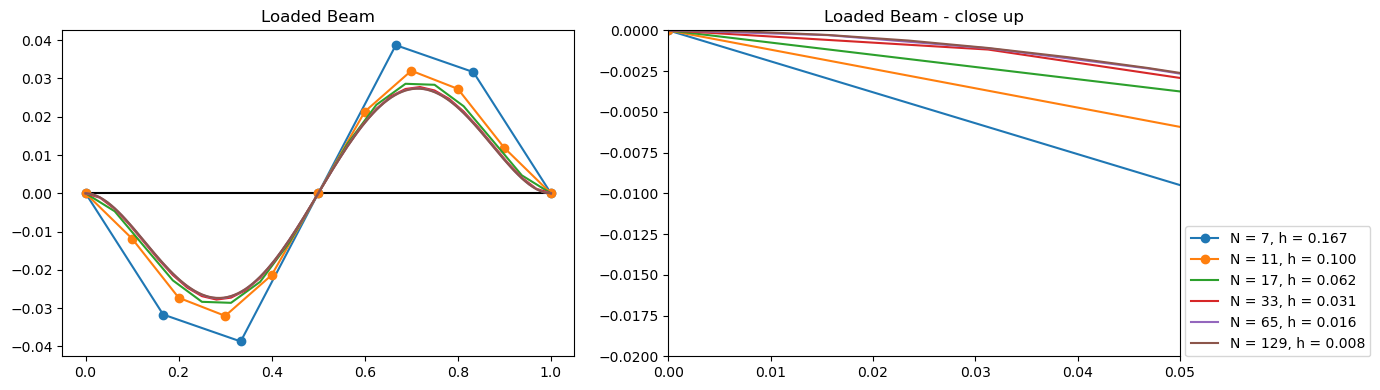

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Loaded Beam')
ax1.plot(np.linspace(0, 1, 100), np.zeros(100), color='k');

ax2.set_title('Loaded Beam - close up')
ax2.plot(np.linspace(0, 1, 100), np.zeros(100), color='k');

for i in range(len(options)):
    
    j = np.linspace(0, 1, options[i])
    load = np.sin(2*np.pi*j)
    # ax.plot(j, load, marker='x', alpha=0.6, label='Load');
    # ax.fill_between(j, load, alpha=0.2)
    
    # Create an empty vector of deformation
    u = np.zeros_like(j)
    
    # Create a matrix
    N = options[i]
    h = 1/(N-1)
    A = np.zeros((N, N))
    
    A[0, 0] = 1 ## Boundary condition
    A[-1, -1] = 1 ## Boundary condition
    for i in range(2, N-2):
        A[i, i-2:i+3] = [1, -4, 6, -4, 1]

    
    for i in [2]:
        A[i-1, i-2:i+3] = [-4, 7, -4, 1, 0]
        A[-2, -5:] = [0, 1, -4, 7, -4]
    # print(A)

    f = np.zeros_like(j)
    for i in range(len(f)):
        f[i] = load[i]*h**4
    
    # Solve the equation
    u = np.linalg.solve(A, -f)
    if N<15:
        ax1.plot(j, 100*u, 'o-', label=f'N = {N}, h = {h:.3f}');
        ax2.plot(j, 100*u, 'o-', label=f'N = {N}, h = {h:.3f}');
    else:
        ax1.plot(j, 100*u, '-', label=f'N = {N}, h = {h:.3f}');
        ax2.plot(j, 100*u, '-', label=f'N = {N}, h = {h:.3f}');
        
    # fig, ax = plt.subplots(figsize=(3,3))
    # ax.imshow(A)
    
    ## Define the P parameter 
    

fig.tight_layout(w_pad=3)
ax2.set_xlim(0, 0.05)
ax2.set_ylim(-0.02, 0)
ax2.legend(loc=(1.01, 0));    

## Parameter P

$$P = \frac{\ln \frac{u_{h3} - u_{h2}}{u_{h2} - u_{h1}}}{\ln(r)}$$

## Defining a function

In [ ]:
def Euler_Bernouli(len, N, load):
    h = len/(N-1)
    # Create an empty vector of deformation
    u = np.zeros_like(j)
    
    # Create a matrix
    A = np.zeros((N, N))
    
    A[0, 0] = 1 ## Boundary condition (u(0) = 0)
    A[-1, -1] = 1 ## Boundary condition (u(1) = 0)
    for i in range(2, N-2):
        A[i, i-2:i+3] = [1, -4, 6, -4, 1] ## 2nd order derivative

    
    for i in [2]:
        A[i-1, i-2:i+3] = [-4, 7, -4, 1, 0]     ## 2nd boundary condition
        A[-2, -5:] = [0, 1, -4, 7, -4]          ## 2nd boundary condition
    print(A)

    f = np.zeros_like(j)
    for i in range(len(f)):
        f[i] = load[i]*h**4
    
    # Solve the equation
    u = np.linalg.solve(A, -f)
    
    return u

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 8))
# ax.set_title('Loaded Beam')
# # ax.plot(x1, f1, alpha=0.4, label='True Load');
# ax.plot(np.linspace(0, 1, 100), np.zeros(100), color='k');

# for i in range(len(options)):
    
#     j = np.linspace(0, 1, options[i])
#     load = np.sin(2*np.pi*j)
#     # ax.plot(j, load, marker='x', alpha=0.6, label='Load');
#     # ax.fill_between(j, load, alpha=0.2)
    
#     # Create an empty vector of deformation
#     u = np.zeros_like(j)
    
#     # Create a matrix
#     N = options[i]
#     h = 1/(N-1)
#     A = np.zeros((N, N))
    
#     A[0, 0] = 1 ## Boundary condition
#     A[-1, -1] = 1 ## Boundary condition
#     for i in range(2, N-2):
#         A[i, i-2:i+3] = [1, -4, 6, -4, 1]

    
#     for i in [2]:
#         A[i-1, i-2:i+3] = [-4, 7, -4, 1, 0]
#         A[-2, -5:] = [0, 1, -4, 7, -4]
#     # print(A)

#     f = np.zeros_like(j)
#     for i in range(len(f)):
#         f[i] = load[i]*h**4
    
#     # Solve the equation
#     u = np.linalg.solve(A, -f)
#     if N<150:
#         ax.plot(j, 100*u, 'o-', label=f'N = {N}, h = {h:.3f}');
#     else:
#         ax.plot(j, 100*u, '-', label=f'N = {N}, h = {h:.3f}');
    
# ax.legend(loc=(1.01, 0));    